# Regressão Linear Múltipla

## Boston Housing Dataset
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,00 sq.ft.
3. INDUS: proportion of non-retail business acres pertown
4. CHAS: Charles River dummy variable (=1 if track bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ration by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

## Carregando o dataset

In [2]:
colunas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TARGET']
dataset = pd.read_csv("./data/boston-houses.csv", names = colunas, delim_whitespace=True)

In [3]:
# Gerabndo número de observações e variáveis
observations = len(dataset)
variables = dataset.columns[:-1]

In [4]:
# Coletando x e y
X = dataset.iloc[:, :-1]
y = dataset['TARGET'].values

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [6]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Usando Múltiplos atributos com o StatsModels

In [7]:
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [8]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        15:10:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Matriz de Correlação

In [9]:
# Gerando a matriz
X = dataset.iloc[:, :-1]
matriz_corr = X.corr()
print(matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [10]:
# Criando um Correlation Plot
def visualize_corr_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

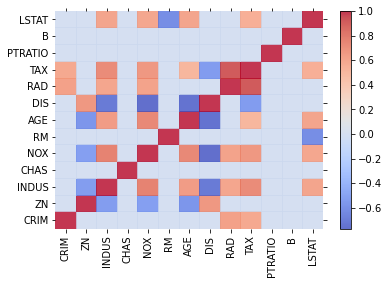

In [11]:
# Visualizando o Plot
visualize_corr_matrix(X, hurdle = 0.5)

## Avaliando a Multicolinearidade

## Autovalores (Eigenvalues) e Autovetores (Eigenvectors)

Uma forma ainda mais automática de detectar associações multicolineares (e descobrir problemas numéricos em uma inversão da matriz) é usar autovetores. Em termos simples, os autovetores são uma maneira muito inteligente de recombinar a variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. Tal recombinação pode ser obtida usando a função NumPy linalg.eig, resultando em um vetor de autovalores (representando a quantidade de variância recombinada para cada nova variável) e autovetores (uma matriz nos dizendo como as novas variáveis se relacionam com as antigas).

In [12]:
# Gerando eigenvalues e eigenvectors
corr = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

Depois de extrair os autovalores, imprimiros em ordem decrescente e procuramos qualquer elemento cujo valor seja próximo de zer ou pequeno em comparação aos outros. Valores próximos a zero podem representar um problema real para equações normais e outros métodos de otimização baseados na inversão matricial. Valores pequenos representam uma fonte elevada, mas não crítica, de multicolinearidade. Se você detectar qualquer um desses valores baixos, anote a posição no vetor (lembre que a indexação em Python começa com 0).

O menor valor está na posição 8. Valor buscar a posição 8 no autovetor.

In [13]:
print(eigenvalues)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


Usando a posição do índice na lista de autovalores, podemos encontrar o vetor específico nos autovetores que contém as variáveis carregadas, ou seja, o nível de associação com os valores originais. No eigenvector, observamos valores nas posições de índice 2, 8 e 9, que estão realmente em destaque em termos de valor absoluto.

In [14]:
print(eigenvectors[:,8])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


Agora nós imprimimos os nomes das variáveis para saber quais contribuem mais com seus valores para construir o autovetor. Associamos o vetor de variáveis com o eigenvector.

In [15]:
print(variables[2], variables[8], variables[9])

INDUS RAD TAX


Tendo encontrado os culpados da multicolinearidade, o que devemos fazer com essas variáveis? A remoção de algumas delas é geralmente a melhor solução.

## Gradiente Descendente

In [16]:
# Gerando os dados
observations = len(dataset)
variables = dataset.columns

### Feature Scaling

Podemos aplicar Feature Scalling através de padronização ou normalização. Normalização aplica escala aos dados com intervalos entre 0 e 1. A padronização divide a média pelo desvio padrão para obter uma unidade de variância. Vamos usar a padronização (StandardScaler) pois nesse caso esta técnica ajusta os coeficientes e torna a superfície de erros mais "tratável".

In [17]:
# Aplicando a padronização
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_

In [18]:
# Gerando X e Y
Xst = np.column_stack((Xst, np.ones(observations)))
y = dataset['TARGET'].values

In [19]:
import random

def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [20]:
# IMprimindo o resultado 
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print("Coeficientes finais padronizados: " + ", ".join(map(lambda x: "%0.4f" % x, w)))

Coeficientes finais padronizados: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


In [21]:
# Desfazendo a padronização
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias = w[-1]-np.sum((original_means / original_stds) * w[:-1])

In [22]:
# Imprimindo o resultado
print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):
    print('%8s: %8.4f' % (varname, beta))

    bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


## Importância dos Atributos

In [23]:
# Criando um modelo
modelo = linear_model.LinearRegression(fit_intercept = True)

In [24]:
modelo.fit(X, y)
for coef, var in sorted(zip(map(abs, modelo.coef_), dataset.columns[:-1]), reverse = True):
    print("%6.3f %s" % (coef, var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [25]:
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

In [26]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse = True):
    print("%6.3f %s" % (coef, var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


## Usando o R Squared

In [27]:
modelo = linear_model.LinearRegression(fit_intercept = True)

In [28]:
def r2_est(X, y):
    return r2_score(y, modelo.fit(X,y).predict(X))

In [29]:
print('Baseline R2: %0.3f' % r2_est(X,y))

Baseline R2: 0.741


In [30]:
# Gera o impacto de cada atributo no R2
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
    print('%6.3f %s' % (imp, varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE
